# First visualization
## Which song has higher chance of bigger hit based on the weeks on rank (track)

Using multiple linear regression, find the relatiship between each features and the track

In [1]:
# import necessary library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# open csv file that will be used
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

Simple data statistic and visualization

In [3]:
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,77,50,20,2016-07-23,2016-02-02,"Canada,Pop",NaN
1,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,66,50,19,2016-07-16,2016-02-02,"Canada,Pop",NaN
2,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,58,50,18,2016-07-09,2016-02-02,"Canada,Pop",NaN
3,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,52,50,17,2016-07-02,2016-02-02,"Canada,Pop",NaN
4,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,51,50,16,2016-06-25,2016-02-02,"Canada,Pop",NaN


In [4]:
df_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000
mean,0.630452,0.680841,5.370448,-5.923614,0.671155,0.094333,0.168215,0.020590,0.177002,0.483900,122.314437,224554.002421,3.980319,38.997759,10.034895,0.929866,48.669470,32.566437,12.544335
std,0.141967,0.173342,3.604804,2.490379,0.469798,0.095084,0.216854,0.118153,0.137641,0.217227,28.610550,44863.177084,0.233172,17.512736,2.444705,0.255375,28.811307,27.864664,10.265445
min,0.121000,0.009660,0.000000,-32.248000,0.000000,0.022500,0.000006,0.000000,0.016700,0.022400,48.718000,59387.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,0.544000,0.568000,2.000000,-6.914000,0.000000,0.036800,0.020500,0.000000,0.095300,0.322000,99.679000,199480.000000,4.000000,27.813740,8.000000,1.000000,23.000000,6.000000,5.000000
50%,0.638000,0.708000,6.000000,-5.522000,1.000000,0.052100,0.074500,0.000000,0.120000,0.476000,122.021000,219043.000000,4.000000,34.798000,10.000000,1.000000,48.000000,27.000000,10.000000
75%,0.730000,0.813000,8.000000,-4.393000,1.000000,0.106000,0.227000,0.000016,0.211000,0.647000,140.253000,240400.000000,4.000000,45.562910,11.000000,1.000000,73.000000,55.000000,17.000000
max,0.980000,0.991000,11.000000,-0.716000,1.000000,0.733000,0.992000,0.973000,0.979000,0.976000,208.067000,726947.000000,5.000000,213.154990,24.000000,1.000000,100.000000,100.000000,87.000000


In [5]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61126 entries, 0 to 61125
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             61126 non-null  object 
 1   artist            61126 non-null  object 
 2   danceability      61126 non-null  float64
 3   energy            61126 non-null  float64
 4   key               61126 non-null  int64  
 5   loudness          61126 non-null  float64
 6   mode              61126 non-null  int64  
 7   speechiness       61126 non-null  float64
 8   acousticness      61126 non-null  float64
 9   instrumentalness  61126 non-null  float64
 10  liveness          61126 non-null  float64
 11  valence           61126 non-null  float64
 12  tempo             61126 non-null  float64
 13  duration_ms       61126 non-null  int64  
 14  time_signature    61126 non-null  int64  
 15  chorus_hit        61126 non-null  float64
 16  sections          61126 non-null  int64 

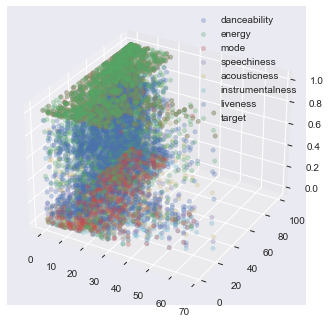

In [6]:
df_10_samp = df_10.sample(1500)

labels = ["danceability", "energy", "mode", "speechiness", 
          "acousticness", "instrumentalness", "liveness", "target"]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for l in labels:
    ax.scatter(df_10_samp['Weeks.on.chart'], df_10_samp['Weekly.rank'], 
               df_10_samp[l], label = l, alpha = 0.3)


ax.legend(loc = "best")
plt.show()

linear regression using statsmodels.OLS()

In [7]:
X1, y = df_10.select_dtypes(exclude=['object']), df_10['Weeks.on.chart']

In [8]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Weeks.on.chart   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.265e+31
Date:                Tue, 17 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:27:21   Log-Likelihood:                      1.6849e+06
No. Observations:               61126   AIC:                                 -3.370e+06
Df Residuals:                   61107   BIC:                                 -3.370e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability      1.462e-13   8.41e-15     17.380      0.000     1.3e-13    1.63e-13
energy           -8.539e-14      1e-14     -8.506      0.000   -1.05e-13   -6.57e-14
key              -9.823e-17   2.92e-16     -0.337      0.736    -6.7e-16    4.73e-16
loudness           3.25e-15   6.35e-16      5.115      0.000       2e-15     4.5e-15
mode             -5.042e-15   2.29e-15     -2.204      0.028   -9.53e-15   -5.59e-16
speechiness      -6.273e-15   1.17e-14     -0.537      0.591   -2.92e-14    1.66e-14
acousticness      1.961e-14   5.83e-15      3.366      0.001    8.19e-15     3.1e-14
instrumentalness   4.12e-14   1.06e-14      3.869      0.000    2.03e-14    6.21e-14
liveness         -2.304e-15   7.86e-15     -0.293      0.770   -1.77e-14    1.31e-14
valence          -7.867e-16   5.79e-15     -0.136      0.892   -1.21e-14    1.06e-14
tempo             3.252e-16   3.74e-17      8.688      0.000    2.52e-16    3.99e-16
duration_ms       -1.26e-18   3.26e-20    -38.694      0.000   -1.32e-18    -1.2e-18
time_signature    1.023e-14   3.13e-15      3.273      0.001    4.11e-15    1.64e-14
chorus_hit       -5.769e-16   6.69e-17     -8.629      0.000   -7.08e-16   -4.46e-16
sections         -3.222e-16   6.09e-16     -0.529      0.597   -1.52e-15    8.72e-16
target            -1.89e-14   4.59e-15     -4.114      0.000   -2.79e-14    -9.9e-15
Weekly.rank      -2.914e-16   5.03e-17     -5.791      0.000    -3.9e-16   -1.93e-16
Peak.position     4.173e-16   5.25e-17      7.948      0.000    3.14e-16     5.2e-16
Weeks.on.chart       1.0000   1.12e-16    8.9e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                    23423.817   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269125.236
Skew:                           1.518   Prob(JB):                         0.00
Kurtosis:                      12.821   Cond. No.                     2.65e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key, Speechiness, liveness, valence, and sections does not have any important relationship with weeks on chart

repeate with Intercep

In [9]:
predictors = sm.add_constant(X1)
predictors

,const,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
0,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,77,50,20
1,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,66,50,19
2,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,58,50,18
3,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,52,50,17
4,1.0,0.741,0.626,1,-4.826,0,0.0886,0.0200,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,51,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61121,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,58,46,5
61122,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,74,46,4
61123,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,46,46,3
61124,1.0,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.0,0.2610,0.740,119.985,152000,4,32.53856,8,1,53,53,2


In [10]:
model2 = sm.OLS(y, predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.162e+31
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:27:22   Log-Likelihood:             1.7409e+06
No. Observations:               61126   AIC:                        -3.482e+06
Df Residuals:                   61106   BIC:                        -3.482e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.451e-13   9.36e-15    -15.511      0.000   -1.63e-13   -1.27e-13
danceability      1.041e-13   3.47e-15     29.947      0.000    9.72e-14    1.11e-13
energy            1.158e-14   4.33e-15      2.671      0.008    3.08e-15    2.01e-14
key               2.257e-15   1.17e-16     19.214      0.000    2.03e-15    2.49e-15
loudness          1.934e-15   2.73e-16      7.072      0.000     1.4e-15    2.47e-15
mode             -5.715e-15    9.2e-16     -6.212      0.000   -7.52e-15   -3.91e-15
speechiness       3.496e-14   4.69e-15      7.449      0.000    2.58e-14    4.42e-14
acousticness      2.476e-14   2.39e-15     10.356      0.000    2.01e-14    2.95e-14
instrumentalness  1.016e-14   4.27e-15      2.381      0.017     1.8e-15    1.85e-14
liveness         -9.964e-15   3.15e-15     -3.161      0.002   -1.61e-14   -3.79e-15
valence           -2.38e-14   2.32e-15    -10.250      0.000   -2.84e-14   -1.92e-14
tempo             8.945e-19   1.53e-17      0.058      0.953   -2.91e-17    3.09e-17
duration_ms       1.323e-20   1.32e-20      1.006      0.315   -1.26e-20     3.9e-20
time_signature   -1.769e-15   1.84e-15     -0.961      0.337   -5.38e-15    1.84e-15
chorus_hit        5.413e-16    2.7e-17     20.020      0.000    4.88e-16    5.94e-16
sections          9.489e-16   2.45e-16      3.873      0.000    4.69e-16    1.43e-15
target           -6.488e-14   1.87e-15    -34.641      0.000   -6.85e-14   -6.12e-14
Weekly.rank       5.291e-17   2.02e-17      2.618      0.009    1.33e-17    9.25e-17
Peak.position    -1.418e-16    2.1e-17     -6.741      0.000   -1.83e-16   -1.01e-16
Weeks.on.chart       1.0000   4.52e-17   2.21e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     5730.122   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8051.248
Skew:                          -0.755   Prob(JB):                         0.00
Kurtosis:                       3.938   Cond. No.                     5.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

standard scaling

In [11]:
standardScale = (X1-np.mean(X1)) / np.std(X1)

In [12]:
standardScale.dropna(axis='columns', inplace = True)

In [13]:
X3 = sm.add_constant(standardScale)
model3 = sm.OLS(y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weeks.on.chart   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.431e+29
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:27:22   Log-Likelihood:             1.6104e+06
No. Observations:               61126   AIC:                        -3.221e+06
Df Residuals:                   61106   BIC:                        -3.221e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.5443   3.54e-15   3.55e+15      0.000      12.544      12.544
danceability       1.46e-15   4.17e-15      0.351      0.726   -6.71e-15    9.63e-15
energy           -2.739e-15   6.35e-15     -0.432      0.666   -1.52e-14     9.7e-15
key              -2.355e-15   3.58e-15     -0.658      0.510   -9.37e-15    4.66e-15
loudness         -2.658e-15   5.75e-15     -0.462      0.644   -1.39e-14    8.62e-15
mode              4.166e-15   3.65e-15      1.141      0.254   -2.99e-15    1.13e-14
speechiness      -2.203e-16   3.77e-15     -0.058      0.953   -7.61e-15    7.17e-15
acousticness     -1.405e-16   4.38e-15     -0.032      0.974   -8.73e-15    8.44e-15
instrumentalness  9.255e-15   4.26e-15      2.174      0.030    9.09e-16    1.76e-14
liveness          3.637e-15   3.66e-15      0.992      0.321   -3.55e-15    1.08e-14
valence           1.703e-15   4.26e-15      0.400      0.689   -6.65e-15    1.01e-14
tempo            -3.272e-15    3.7e-15     -0.884      0.376   -1.05e-14    3.98e-15
duration_ms       2.205e-15   4.99e-15      0.442      0.658   -7.57e-15     1.2e-14
time_signature   -1.763e-15   3.63e-15     -0.486      0.627   -8.87e-15    5.35e-15
chorus_hit        2.053e-15      4e-15      0.513      0.608   -5.79e-15    9.89e-15
sections          4.892e-16   5.06e-15      0.097      0.923   -9.43e-15    1.04e-14
target            2.189e-14   4.04e-15      5.417      0.000     1.4e-14    2.98e-14
Weekly.rank         6.2e-15   4.92e-15      1.260      0.208   -3.44e-15    1.58e-14
Peak.position     3.342e-15   4.95e-15      0.675      0.500   -6.36e-15     1.3e-14
Weeks.on.chart      10.2654   3.92e-15   2.62e+15      0.000      10.265      10.265
==============================================================================
Omnibus:                     8493.680   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33674.645
Skew:                          -0.655   Prob(JB):                         0.00
Kurtosis:                       6.392   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""